## 2. Получение предсказаний на тестовой выборке и создание файла для kaggle.

Считаем данные из яндекс-диска

In [95]:
import os
import pandas as pd
path = '/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data' 
data = {}

Data = []
Target = []

i=0
for dir_entry in sorted(os.listdir(path)):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            print(dir_entry_path.split("\\")[-1])
            try:
                df = pd.read_csv(my_file, delimiter=';')
                if df.shape[1] == 5:
                    Data.append(df)
                    Target.append(dir_entry_path.split("\\")[-1])
            except UnicodeDecodeError:
                print(dir_entry_path.split("\\")[-1])
                pass

for dir_entry in sorted(os.listdir(path)):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            print(dir_entry_path.split("\\")[-1])
            try:
                df = pd.read_csv(my_file, delimiter=',')
                if df.shape[1] == 5:
                    Data.append(df)
                    Target.append(dir_entry_path.split("\\")[-1])
            except UnicodeDecodeError:
                print(dir_entry_path.split("\\")[-1])
                pass

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_0.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_1.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_10.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_100.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_101.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_102.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_103.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_104.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_105.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_106.csv
/Users/maripoklonskaya/Do

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_59.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_6.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_60.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_61.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_62.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_63.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_64.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_65.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_66.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_67.csv
/Users/maripoklonskaya/Document

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_16.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_17.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_18.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_19.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_2.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_20.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_21.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_22.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_23.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_24.csv
/Users/maripoklonskaya/Document

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_98.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_99.csv


Переведём типы движений в числа

Обработаем данные и извлечём признаки для создания модели

In [126]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
# обрезаем начало и конец трека
    if a == -1:
        st = 1250
    else:
        st = a
            
    if b == -1:
        end = -1250
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
#     fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# приводим данные с Iphone к нужному формату
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        
        try:
            df['gFx'] = df['gFx'].astype(float)
            df['gFy'] = df['gFy'].astype(float)
            df['gFz'] = df['gFz'].astype(float)
        except KeyError:
            return -1

# рисуем графики ускорений
# вычисляем модуль (норму) ускорения и рисуем его
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
#     ax2.plot(Acc)
    

# можно различить многие действия по амплитуде ускорения
    amplitude = Acc.max() - Acc.min()
    print(' АМПЛИТУДА:', Acc.max()-Acc.min())
    print()
    
    
    Fs = 250 #частота сбора данных  
#     Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

#     y = Acc.values
#     n = len(y) # length of the signal
#     k = np.arange(n)
#     T = n/Fs
#     frq = k/T # two sides frequency range
#     frq = frq[:len(frq)//2] # one side frequency range

#     Y = np.fft.fft(y)/n # dft and normalization
#     Y = Y[:n//2]
    
#     yabs = abs(Y)
#     findMax = yabs[1::]
#     xmax = frq[np.argmax(findMax)]
    

    plt.show()
    return amplitude#, xmax


Ampl = np.zeros(len(Data)) 
MaxY = np.zeros(len(Data)) 
for df, target in zip(Data,Target):
    track_num = int(target.split('_')[1].split('.')[0]) # важный момент, что треки не по нумерации идут!
    Ampl[track_num] = process_data(df, name=target)
#     MaxY[track_num] = process_data(df, name=target)[1]

Populating the interactive namespace from numpy and matplotlib
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_0.csv
 АМПЛИТУДА: 1.2409331302405158

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_1.csv
 АМПЛИТУДА: 1.9935598883036225

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_10.csv
 АМПЛИТУДА: 7.802304392990605

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_100.csv
 АМПЛИТУДА: 0.34113272676839523

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_101.csv
 АМПЛИТУДА: 0.4539765748076482

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_102.csv
 АМПЛИТУДА: 2.2110203625988167

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_103.csv
 АМПЛИТУДА: 3.1345378975461413

/Users/maripoklonskaya/Documents

 АМПЛИТУДА: 2.76747032033991

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_3.csv
 АМПЛИТУДА: 7.376276708180853

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_30.csv
 АМПЛИТУДА: 0.1267000078041125

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_31.csv
 АМПЛИТУДА: 2.731441542408507

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_32.csv
 АМПЛИТУДА: 1.037319895576775

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_33.csv
 АМПЛИТУДА: 2.619205131477962

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_34.csv
 АМПЛИТУДА: 0.2729725656202939

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_35.csv
 АМПЛИТУДА: nan

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/tra

 АМПЛИТУДА: 7.956676829256679

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_9.csv
 АМПЛИТУДА: 0.0754719928206189

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_90.csv
 АМПЛИТУДА: 0.025694414883784766

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_91.csv
 АМПЛИТУДА: nan

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_92.csv
 АМПЛИТУДА: 0.3402407681738169

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_93.csv
 АМПЛИТУДА: 1.0520805860431857

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_94.csv
 АМПЛИТУДА: 1.7141168789189019

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_95.csv
 АМПЛИТУДА: 2.4909275186310906

/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-d

Populating the interactive namespace from numpy and matplotlib
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_0.csv
0.09594900628642462


/Users/maripoklonskaya/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


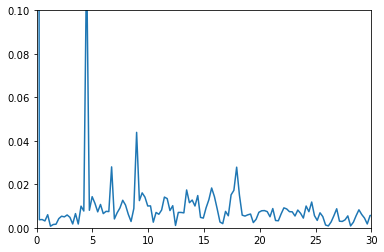

max:  0.12382868990273463
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_1.csv
0.030120795246863404


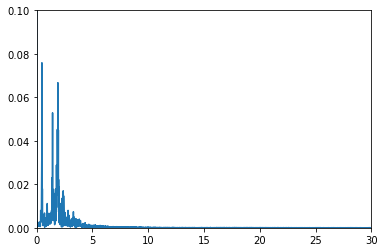

max:  0.0759017653826047
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_10.csv
0.33518801704726436


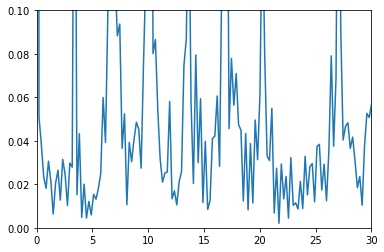

max:  0.5960586018001915
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_100.csv
2.1306990451402794e-05


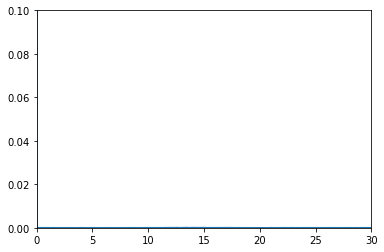

max:  0.00017314348329196413
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_101.csv
0.0016893255465805918


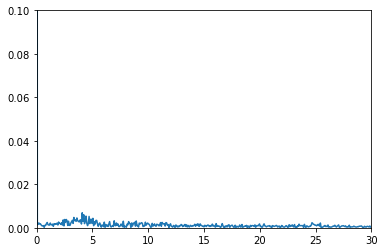

max:  0.006912791043251176
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_102.csv
0.06993132310814629


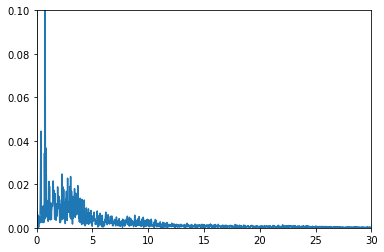

max:  0.1042080599063174
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_103.csv
0.07302495182517245


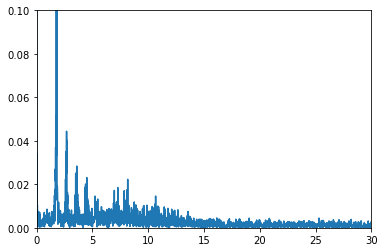

max:  0.12425585072809714
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_104.csv
0.10291743258909966


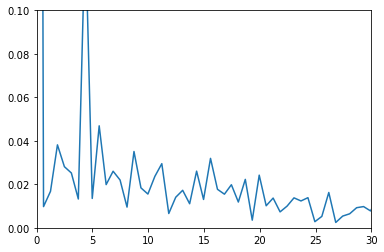

max:  0.13800660869595185
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_105.csv
0.01008877484316692


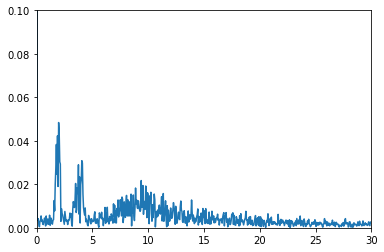

max:  0.04840883573733187
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_106.csv
0.00016420880574693607


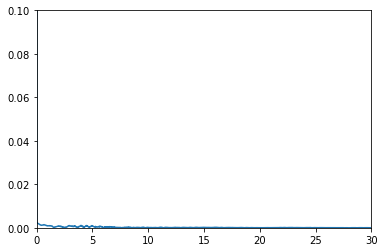

max:  0.002329234812721741
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_107.csv
0.003445377143886527


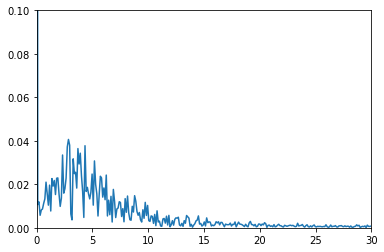

max:  0.04063582863056257
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_108.csv
0.015390034089940156


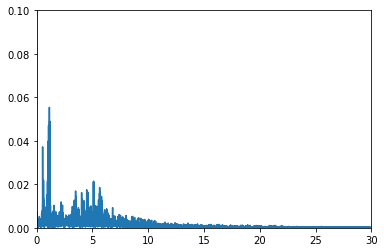

max:  0.0553974729385441
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_109.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_11.csv
0.028990570779461086


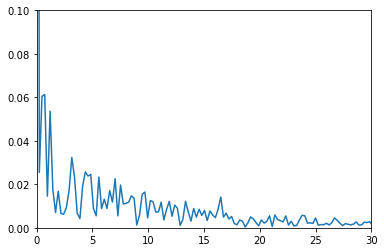

max:  0.06129398929281685
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_110.csv
0.01228670510363706


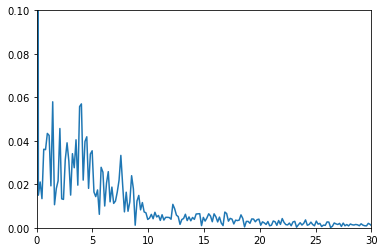

max:  0.057947649734941986
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_111.csv
3.5740128177365186e-05


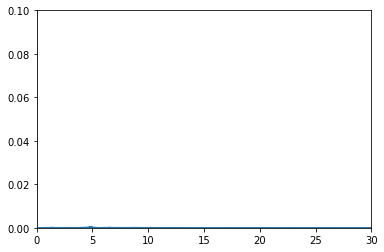

max:  0.0003387308685090793
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_112.csv
0.0811808578942776


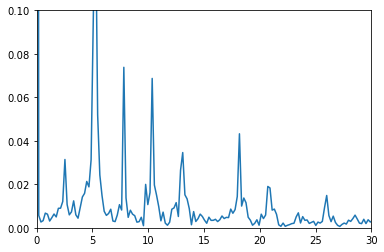

max:  0.14987781368316921
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_113.csv
0.002439626682571149


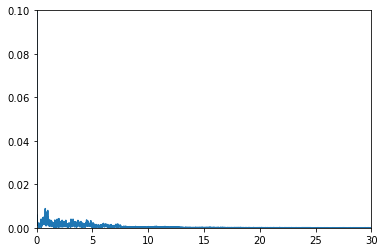

max:  0.008832908830105889
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_114.csv
0.03838505862113276


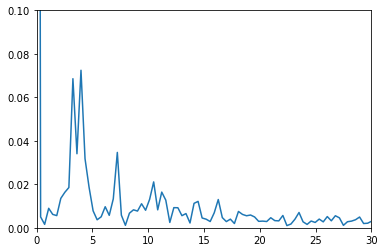

max:  0.07244769543520613
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_115.csv
0.10473316074384856


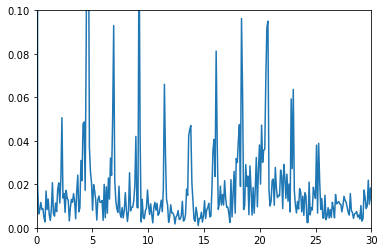

max:  0.20095152811368158
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_116.csv
0.1113097921751742


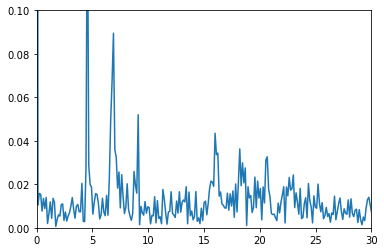

max:  0.16332288606034304
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_117.csv
6.64561101382001e-05


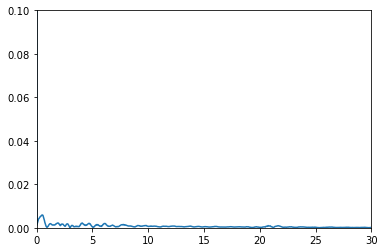

max:  0.005917579540445099
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_118.csv
0.013132346556560488


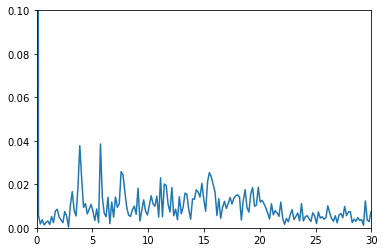

max:  0.038525680985863016
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_119.csv
0.008369126548985507


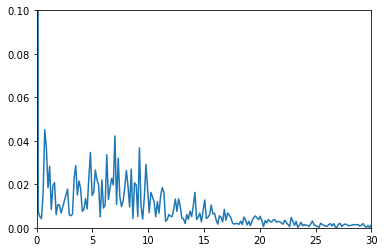

max:  0.045120808964902344
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_12.csv
0.22910373080760965


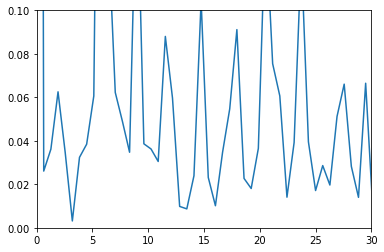

max:  0.3673542132343612
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_120.csv
0.06606749989418778


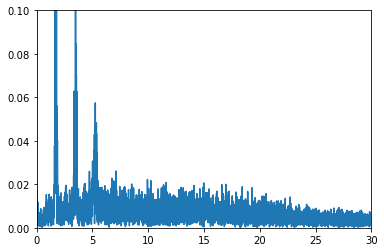

max:  0.2692258184205026
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_121.csv
9.41813255445962e-05


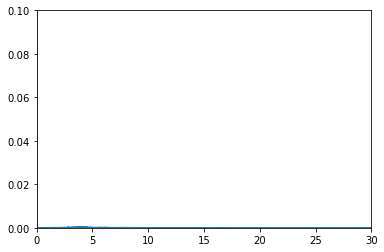

max:  0.0005795322517390269
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_122.csv
0.040040703696383274


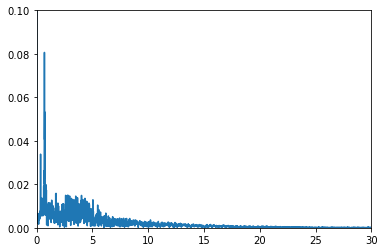

max:  0.08065389925682198
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_123.csv
0.028516572923744522


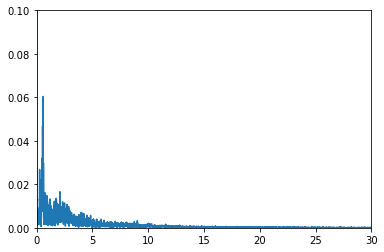

max:  0.060390008122837124
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_124.csv
0.05400485676267751


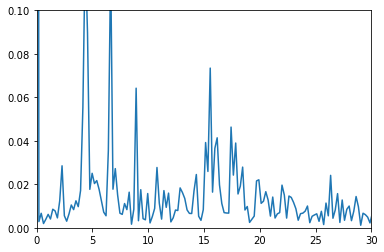

max:  0.1274514327874371
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_125.csv
0.01056639161139215


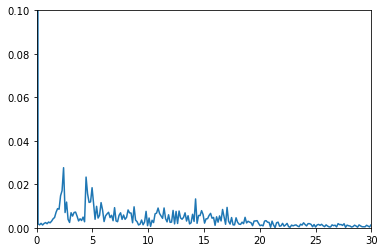

max:  0.02763932475737534
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_126.csv
0.20638771178882248


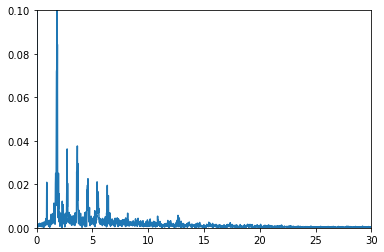

max:  0.27823666294276056
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_127.csv
0.0004966497855554


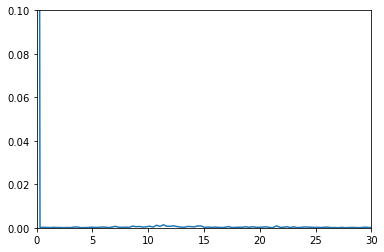

max:  0.0013709295074943206
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_128.csv
0.0015418443307767468


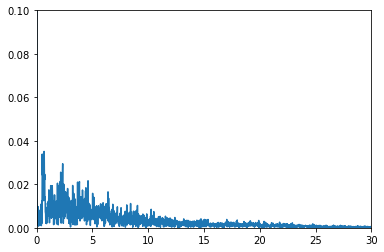

max:  0.035117891358805824
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_129.csv
0.0005117039450020184


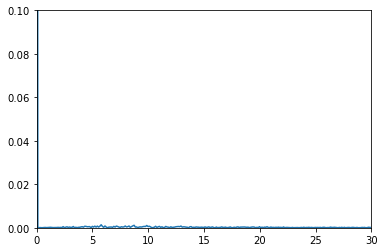

max:  0.0013897979085133864
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_13.csv
0.016624500679711773


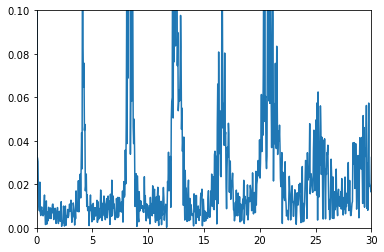

max:  0.22379289336248076
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_130.csv
0.04101420564307344


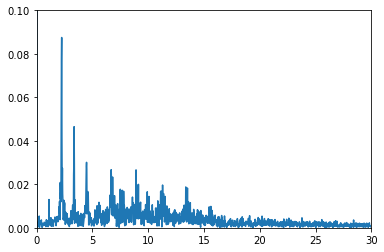

max:  0.08751485914200811
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_131.csv
0.0423705328110202


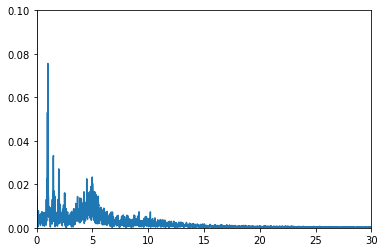

max:  0.07555248483644521
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_132.csv
0.01056639161139215


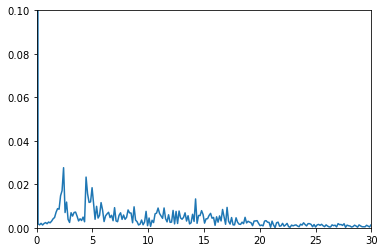

max:  0.02763932475737534
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_133.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_134.csv
0.016409462702155722


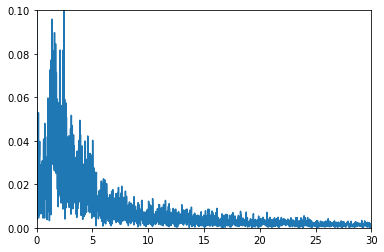

max:  0.10104397993073541
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_135.csv
0.07609745676747844


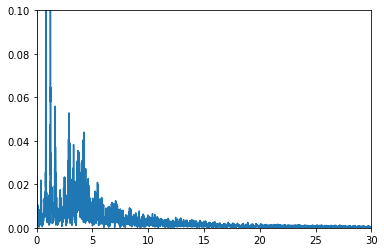

max:  0.13387021669663568
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_136.csv
0.05475222710342456


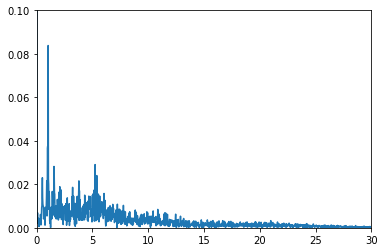

max:  0.08382866937112314
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_137.csv
0.044109380163236074


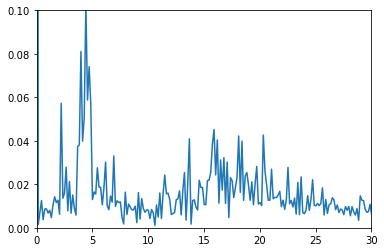

max:  0.10290894203033484
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_138.csv
0.01618543962470365


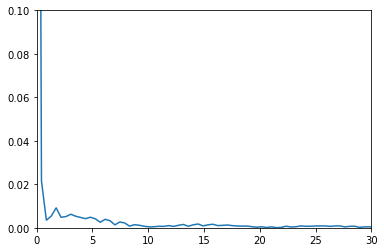

max:  0.021559690608411702
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_139.csv
1.556563735207958e-05


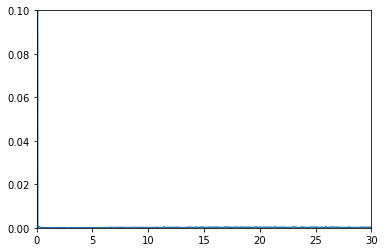

max:  0.00047612627517869483
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_14.csv
0.0013285576512191803


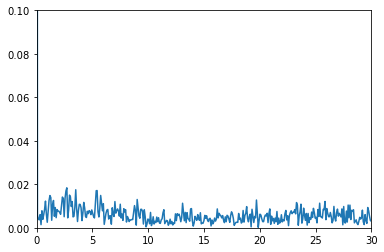

max:  0.018385805711643177
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_140.csv
0.20528361427539993


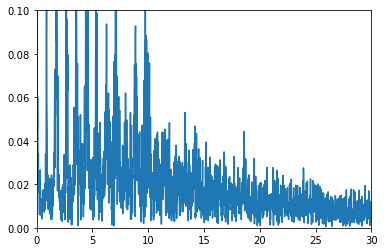

max:  0.4680699401877782
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_141.csv
0.0006205058488927065


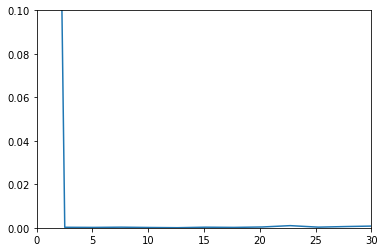

max:  0.0009916432536826146
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_142.csv
0.0016850533721319387


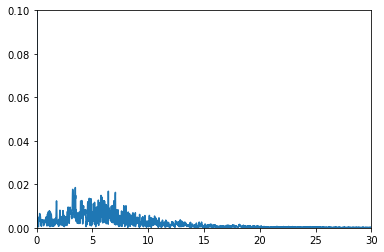

max:  0.01850304265663551
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_143.csv
0.0015275161485347587


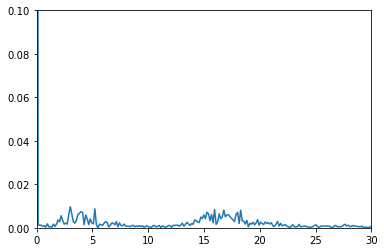

max:  0.009677556394565634
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_144.csv
0.07410375053820979


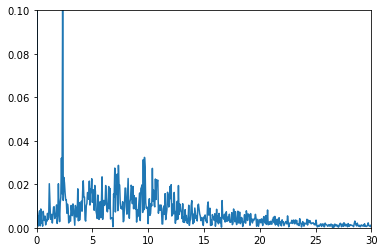

max:  0.10543424619164489
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_145.csv
0.165557461312184


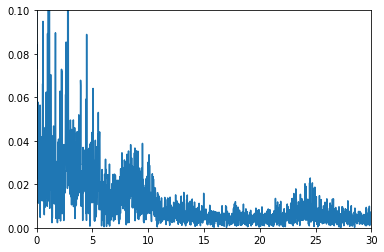

max:  0.31269363431946523
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_15.csv
0.02423643536432257


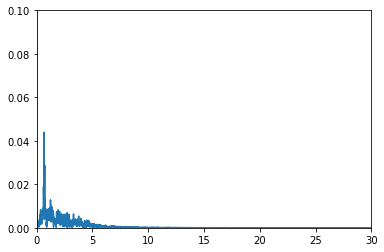

max:  0.043965653482894246
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_16.csv
0.012103778267604288


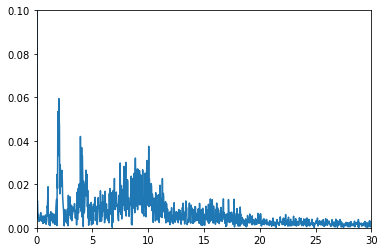

max:  0.0594349084462872
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_17.csv
0.009302370815943786


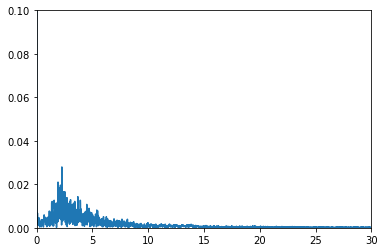

max:  0.027977036977256627
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_18.csv
0.029975064514915044


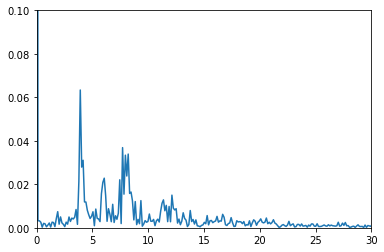

max:  0.06336649645998228
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_19.csv
0.038275178427213355


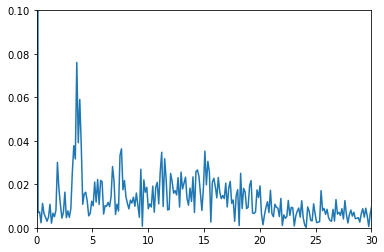

max:  0.0760418941941998
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_2.csv
0.004681958460279301


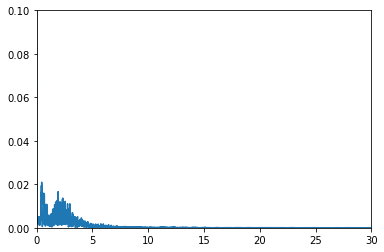

max:  0.020934995074768568
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_20.csv
0.15281125488328495


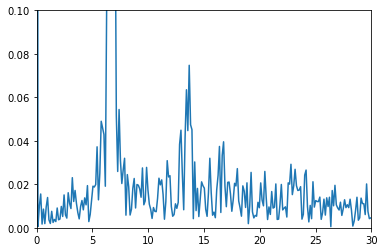

max:  0.32126996422081405
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_21.csv
0.2331651420444311


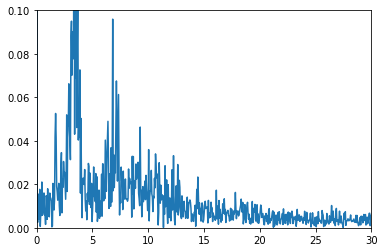

max:  0.34463599789037697
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_22.csv
0.03522616160161134


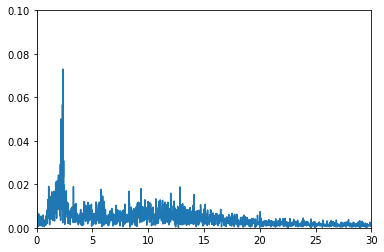

max:  0.07294108051339807
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_23.csv
0.0026622256284356176


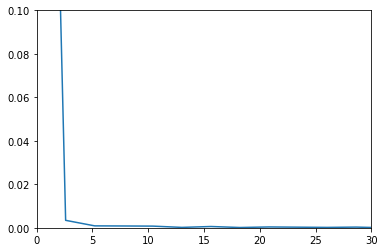

max:  0.003434000559244515
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_24.csv
0.18680171713926594


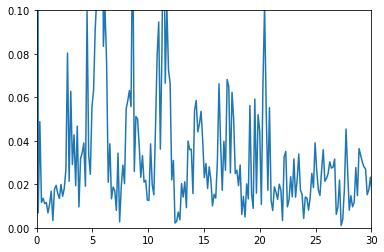

max:  0.3292341220675369
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_25.csv
0.0004651229094683809


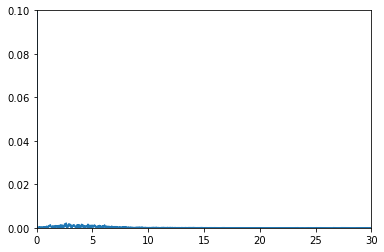

max:  0.0021725241613850415
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_26.csv
0.01088474838410096


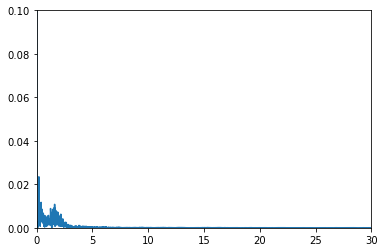

max:  0.02344632071024288
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_27.csv
0.02076403509299589


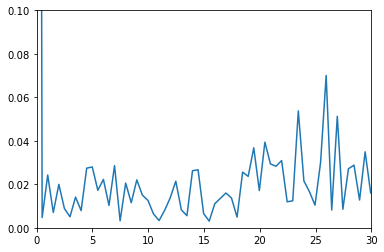

max:  0.07005714535601888
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_28.csv
0.06613085970192671


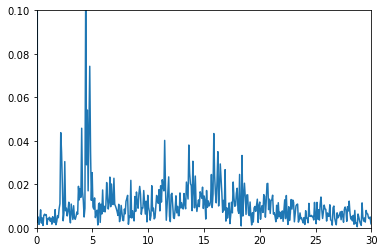

max:  0.11192207779905504
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_29.csv
0.018356443055108328


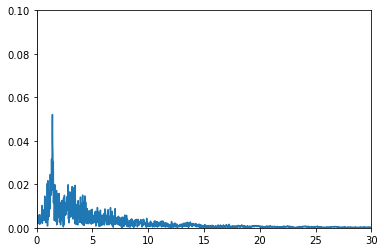

max:  0.052095675376440984
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_3.csv
0.19737139468576093


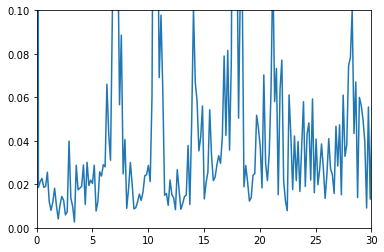

max:  0.41928825714905993
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_30.csv
6.05324443112876e-05


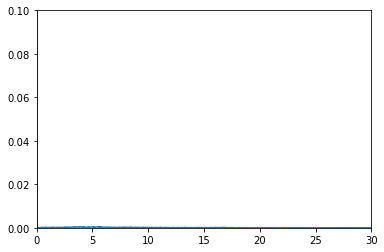

max:  0.0005456195243915532
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_31.csv
0.01305283131477391


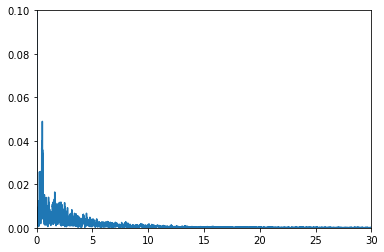

max:  0.04893612226720903
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_32.csv
0.0025918782675977145


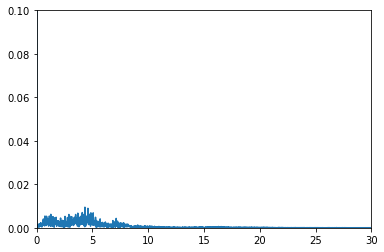

max:  0.009465553692660191
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_33.csv
0.02399659207458959


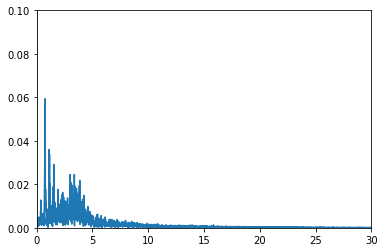

max:  0.059351537712403354
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_34.csv
0.00032927687249557393


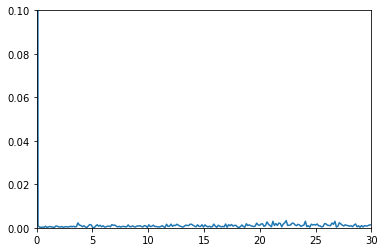

max:  0.003300535964605903
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_35.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_36.csv
2.1146443390786425e-05


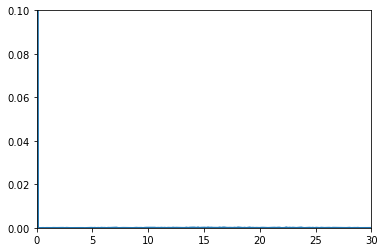

max:  0.0002894181106789005
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_37.csv
0.00012730938594191247


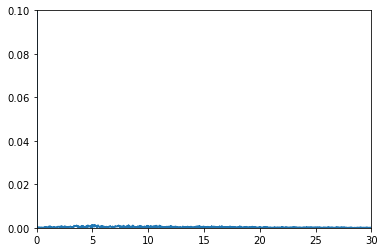

max:  0.001426739771510159
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_38.csv
0.0007119886893291612


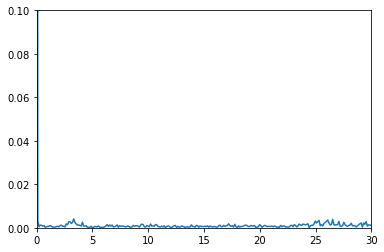

max:  0.004107201490954342
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_39.csv
4.9070529838203276e-05


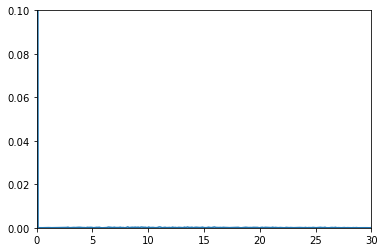

max:  0.00040957890114762995
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_4.csv
0.018679257849942225


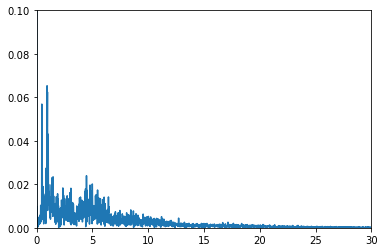

max:  0.06531859319223321
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_40.csv
0.1948716606576469


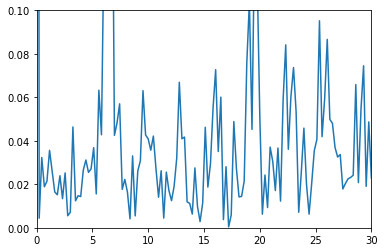

max:  0.3297337011911723
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_41.csv
0.0796738508767326


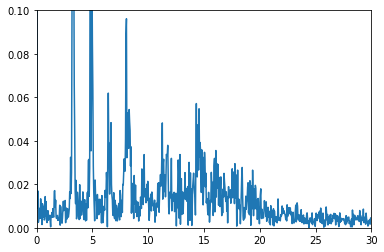

max:  0.2146851071099364
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_42.csv
0.00013328116439903395


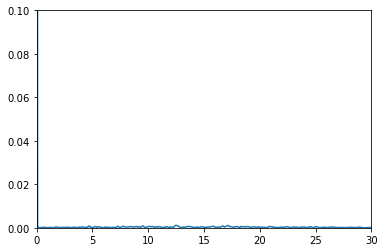

max:  0.0011524692526428998
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_43.csv
0.05209605598599535


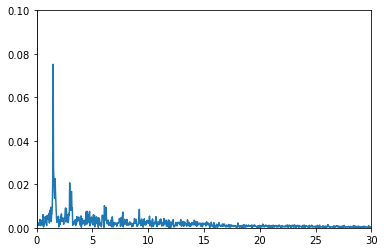

max:  0.07520345251740575
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_44.csv
0.019150414070753463


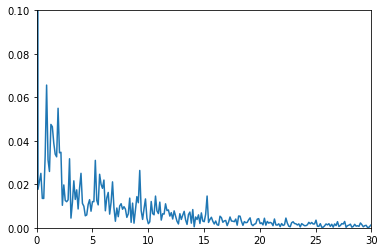

max:  0.06563831625185942
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_45.csv
0.0026622256284356176


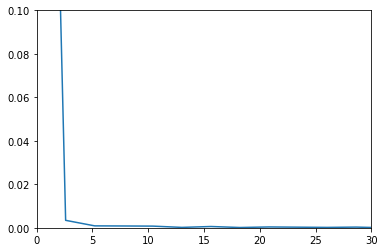

max:  0.003434000559244515
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_46.csv
0.0007884090549426723


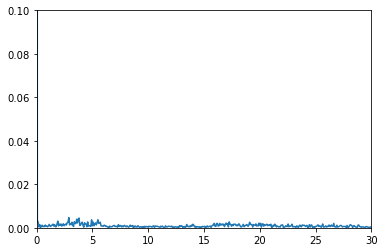

max:  0.00469969610669258
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_47.csv
0.20506235215151086


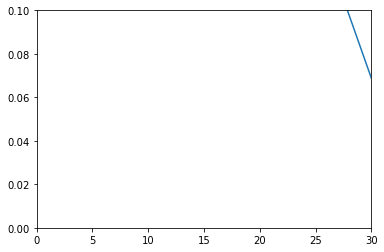

max:  0.24295258486339463
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_48.csv
0.0006752677796115535


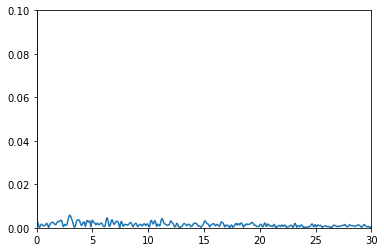

max:  0.005800397772583878
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_49.csv
0.16212629925540448


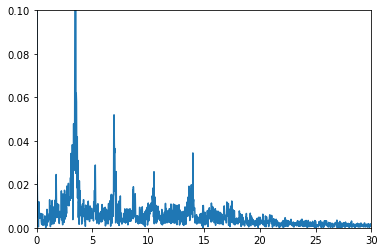

max:  0.2692162551689254
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_5.csv
0.043558723777337396


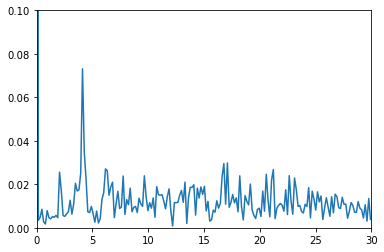

max:  0.07309587215743461
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_50.csv
0.028990570779461086


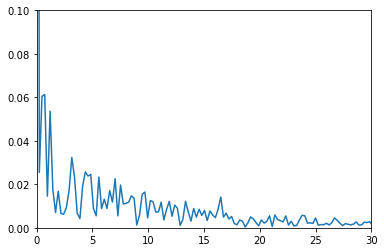

max:  0.06129398929281685
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_51.csv
0.1671809952783688


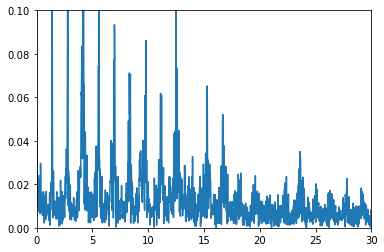

max:  0.3009623875939815
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_52.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_53.csv
0.000508094195693606


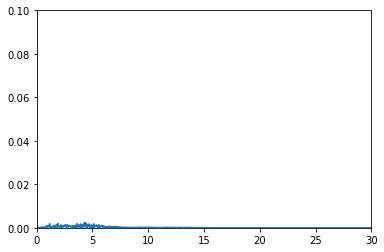

max:  0.0024978907515108067
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_54.csv
0.01933974460064894


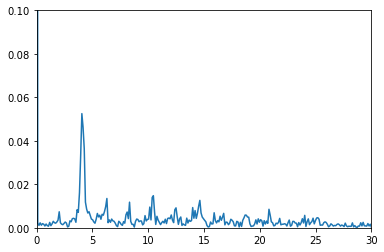

max:  0.05250929325588698
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_55.csv
0.07531370511125783


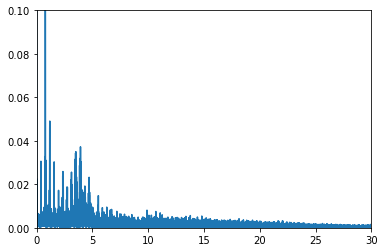

max:  0.12080834575900198
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_56.csv
0.012996077576874904


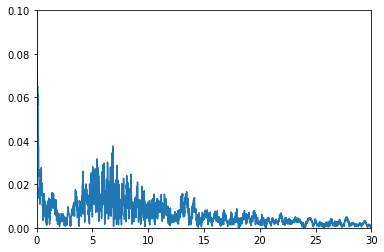

max:  0.07794688645980902
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_57.csv
0.011746297219427812


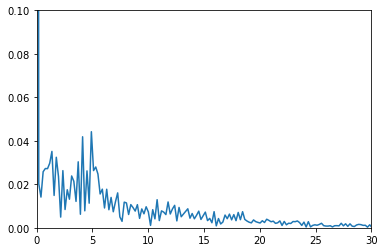

max:  0.0441854909809051
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_58.csv
0.011525983125841036


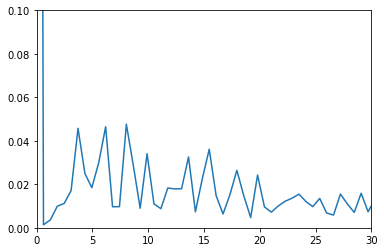

max:  0.04764171503009521
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_59.csv
0.004802545442431893


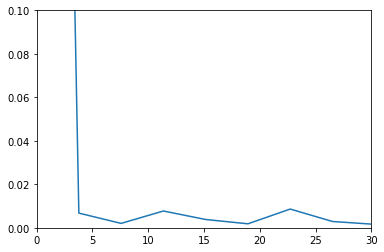

max:  0.008621385657620278
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_6.csv
0.019150414070753463


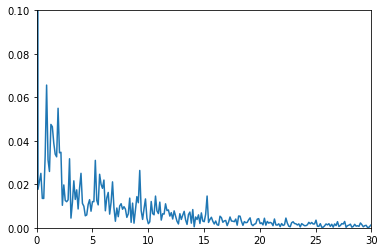

max:  0.06563831625185942
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_60.csv
9.439726169391694e-05


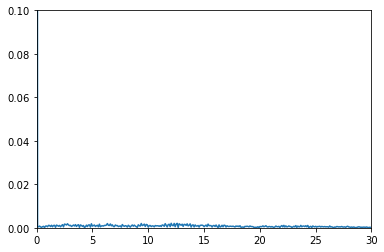

max:  0.002072828108423671
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_61.csv
0.002920462158059139


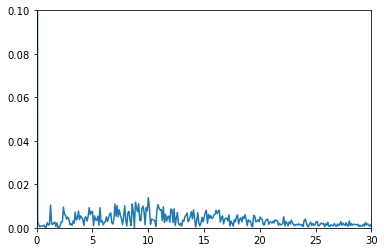

max:  0.01386177885176713
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_62.csv
0.03384225078362935


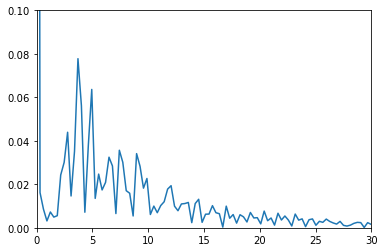

max:  0.07778031532473369
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_63.csv
0.21374280651617042


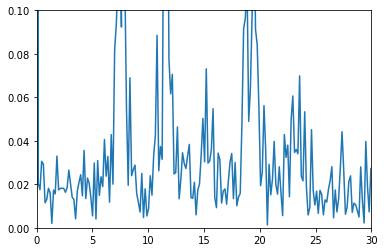

max:  0.38227586822595944
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_64.csv
2.709042617332673e-05


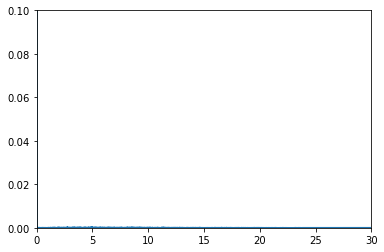

max:  0.00039696289363644517
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_65.csv
0.002920462158059139


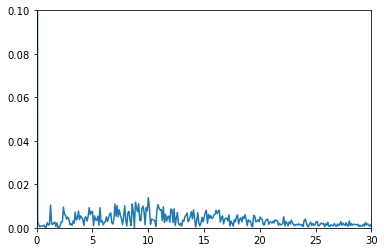

max:  0.01386177885176713
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_66.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_67.csv
0.003445377143886527


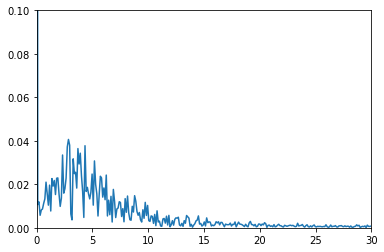

max:  0.04063582863056257
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_68.csv
0.11939442646739604


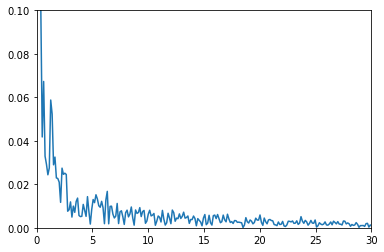

max:  0.1866921321496027
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_69.csv
0.1035186750246859


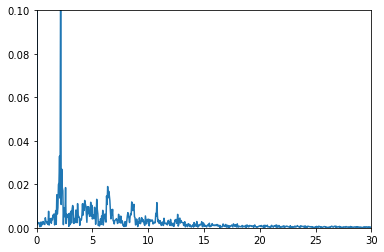

max:  0.12436463657170281
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_7.csv
0.2080768159490461


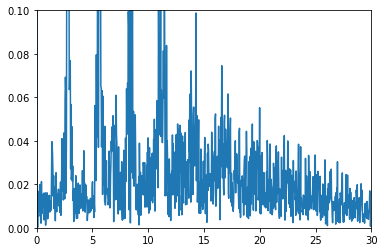

max:  0.4601426994523482
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_70.csv
4.9753049961098094e-05


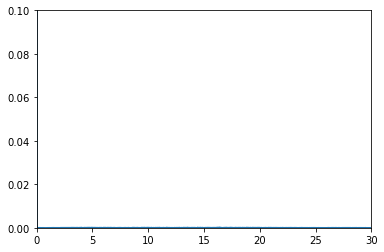

max:  0.00021929868129413245
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_71.csv
0.001682742293401423


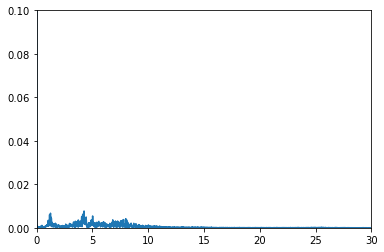

max:  0.007723155647174517
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_72.csv
0.0058536806440700195


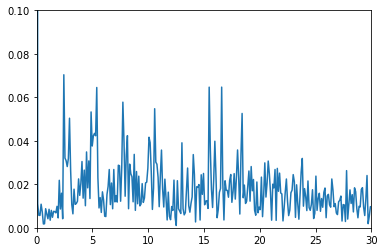

max:  0.0703803378437102
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_73.csv
0.008369126548985507


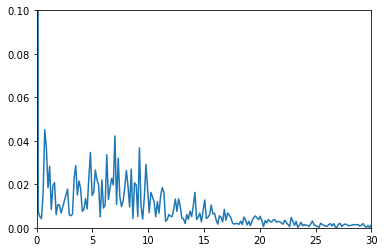

max:  0.045120808964902344
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_74.csv
0.12237162248710985


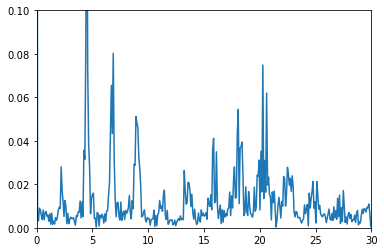

max:  0.19721660997565085
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_75.csv
0.23189057586208586


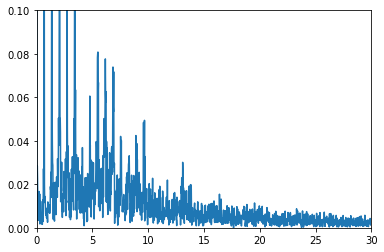

max:  0.39231486742141836
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_76.csv
0.22469490495681693


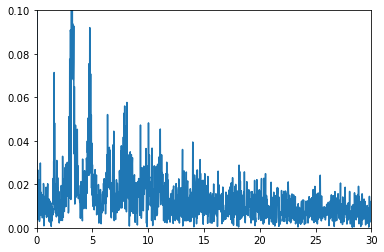

max:  0.3318445495315999
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_77.csv
0.01228670510363706


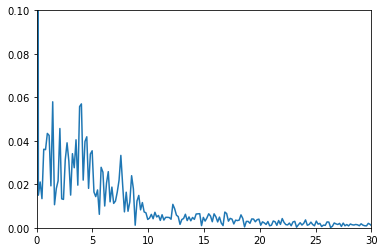

max:  0.057947649734941986
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_78.csv
0.018356443055108328


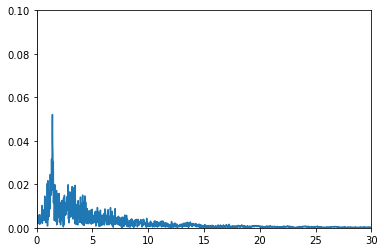

max:  0.052095675376440984
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_79.csv
0.16672394221539352


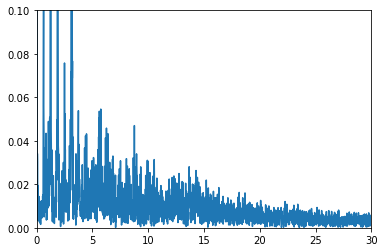

max:  0.34891160746298383
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_8.csv
0.01071760473622449


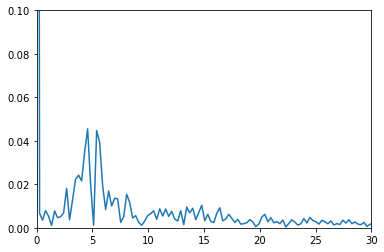

max:  0.04552248338467934
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_80.csv
0.08199390722007441


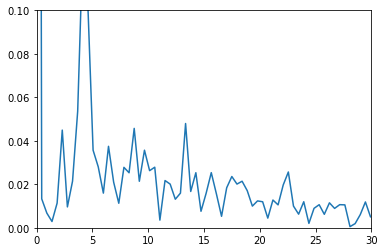

max:  0.12995362330627355
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_81.csv
0.007370828719178005


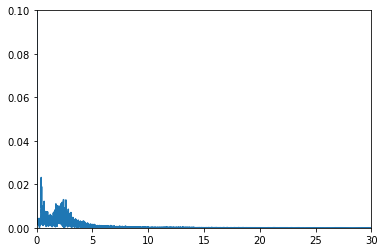

max:  0.023140144019673965
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_82.csv
0.03786522680645305


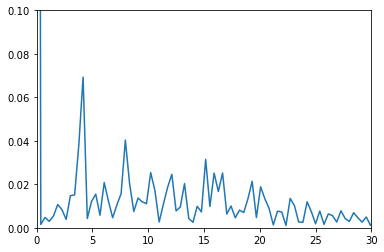

max:  0.06931511401347303
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_83.csv
0.011746297219427812


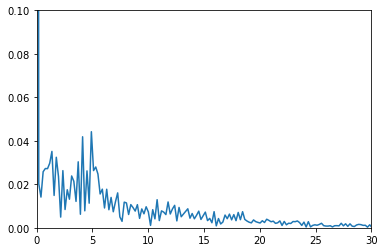

max:  0.0441854909809051
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_84.csv
0.20506235215151086


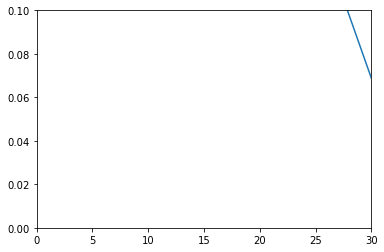

max:  0.24295258486339463
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_85.csv
0.2243843446806122


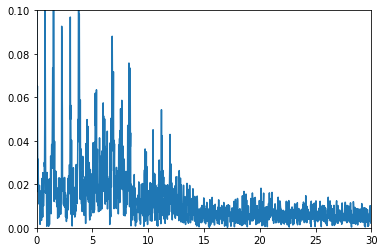

max:  0.38112955212927263
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_86.csv
0.016370539273642973


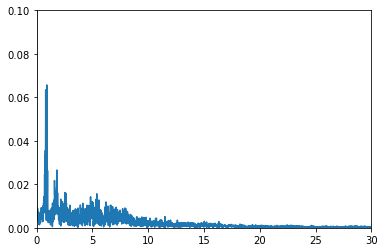

max:  0.06569350995717056
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_87.csv
0.13893590840246955


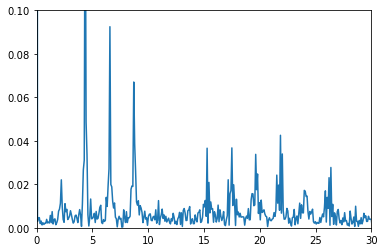

max:  0.18759949062179426
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_88.csv
0.17224146987732428


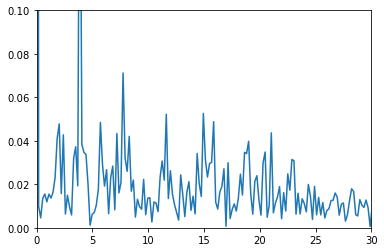

max:  0.2244433432349821
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_89.csv
0.016984188597838915


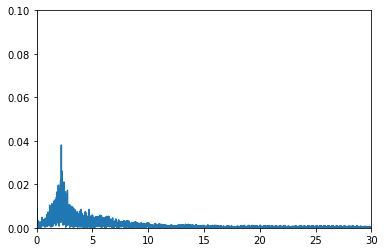

max:  0.03806383943302585
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_9.csv
3.547878412014666e-05


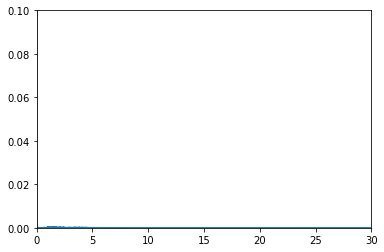

max:  0.00041885717414673134
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_90.csv
6.834856856044558e-05


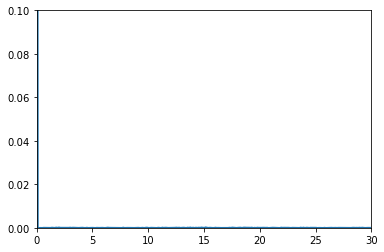

max:  0.0002866507353719613
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_91.csv
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_92.csv
0.0003130924778186714


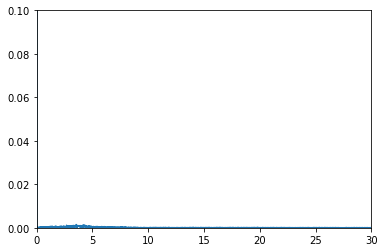

max:  0.0014900255875704845
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_93.csv
0.03824561735424864


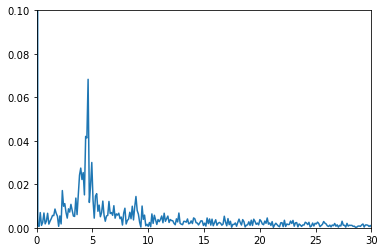

max:  0.06828728084292311
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_94.csv
0.00018201597472360543


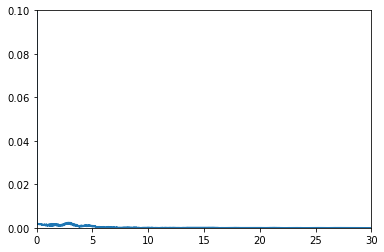

max:  0.0024633294235724165
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_95.csv
0.03861421984009712


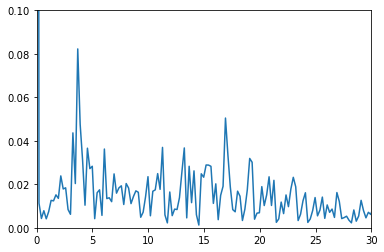

max:  0.08226834099521903
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_96.csv
0.016984188597838915


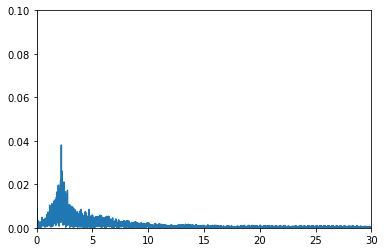

max:  0.03806383943302585
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_97.csv
0.009302370815943786


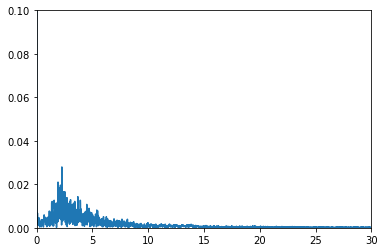

max:  0.027977036977256627
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_98.csv
0.00038154117464411964


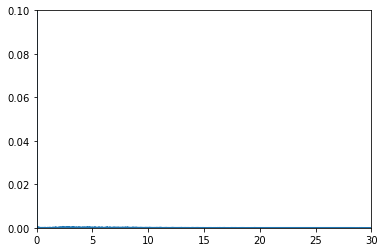

max:  0.0008654468259344062
/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/kaggle-data/track_99.csv
0.021817931158597183


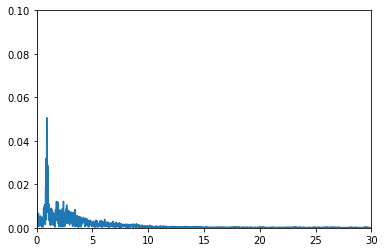

max:  0.05058519461134732


In [375]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data2(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
# обрезаем начало и конец трека
    if a == -1:
        st = 1250
    else:
        st = a
            
    if b == -1:
        end = -1250
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)

# приводим данные с Iphone к нужному формату
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        
        try:
            df['gFx'] = df['gFx'].astype(float)
            df['gFy'] = df['gFy'].astype(float)
            df['gFz'] = df['gFz'].astype(float)
        except KeyError:
            return -1

    Fs = 250 #частота сбора данных  
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

    y = Acc.values
    n = len(y) # length of the signal
    xmax = 1
    deltaY = 0
    mY = 0
    if n >= 1:
        k = np.arange(n)
        T = n/Fs
        frq = k/T # two sides frequency range
        frq = frq[:len(frq)//2] # one side frequency range

        Y = np.fft.fft(y)/n # dft and normalization
        Y = Y[:n//2]

        yabs = abs(Y)
        findMax = yabs[1::]
        xmax = frq[np.argmax(findMax)]
#         yy = sorted(findMax.copy())
        yy = findMax.copy()
        yy.sort()
        deltaY = yy[-1] - yy[-4]
        mY = yy[-1]
        print(deltaY)
#         print(yy)
#     ymax1 = findMax[np.argmax(findMax)]
    
    
    
        Min = 0
        fig, ax = plt.subplots()
        ax.plot(frq,yabs) # plotting the spectrum
        ax.set_xlim([0,30])
        ax.set_ylim([Min,0.1])
        plt.show()
        print('max: ', mY)
    return xmax, deltaY, mY

MaxY = [] #np.zeros(len(Data)) 
for i in range(len(Data)):
    MaxY.append((0,0,0))
for df, target in zip(Data,Target):
    track_num = int(target.split('_')[1].split('.')[0]) # важный момент, что треки не по нумерации идут!
    MaxY[track_num] = process_data2(df, name=target)

Напишем функцию для получения предсказания (здесь используется только амплитуда, но в вашем итоговом решении будет больше признаков)

In [244]:
levels = pd.read_csv('/Users/maripoklonskaya/Documents/вшэ/мини-курс/Activities-analysis-main/tracks_levels.csv',
                   sep=",")

In [446]:
def get_prediction(ampl, maxY, lev):
    if lev == 'base':
        if ampl < 1:
            return 0 #стояние
        if ampl >  5:
            return 2 #бег
#         if maxY[0] < 0.4:
#             return 3 #велосипед
#         if maxY[0] > 1.2:
#             return 3 #велосипед
        if maxY[1] < 0.01:
#             print(maxY[1])
            return 3 #велосипед
        if maxY[0] < 1.3:
            return 4
#         num = random.choice([1, 4])
        return 1 #ходьба
    if maxY[1] < 0.01:
        return 5
    return 7

In [447]:
len(Data), len(Ampl), len(Target), len(MaxY)

(146, 146, 146, 146)

In [448]:
type(Data)

list

In [449]:
Ampl_new = []

i=0
for elem in Ampl:
    if not (math.isnan(elem) or elem == -1):
        i+=1
        Ampl_new.append(elem)
    else:
        Ampl_new.append(2)
len(Ampl_new), i

(146, 140)

Создадим таблицу, содержащую номер трека и предсказание.

In [462]:
prediction = []
for i in range(len(Ampl)):
    prediction.append(get_prediction(Ampl[i], MaxY[i], levels['level'][i]))
Res = pd.DataFrame({'track_num' : np.arange(len(Data)), 'action' : prediction})
Res['action'][114] = 4
Res['action'][132] = 3
Res['action'][125] = 3
Res['action'][8] = 3
Res['action'][12] = 3
Res['action'][118] = 3
Res['action'][124] = 2
Res['action'][57] = 3
Res['action'][58] = 3
Res['action'][83] = 3

Res['action'][137] = 4
Res['action'][16] = 4
Res['action'][62] = 4

Res['action'][74] = 2
Res['action'][80] = 4

Res['action'][117] = 0
Res['action'][48] = 0
Res['action'][61] = 0
Res['action'][65] = 0

Res['action'][33] = 1
Res.head(10)

,track_num,action
0,0,1
1,1,4
2,2,3
3,3,2
4,4,4
5,5,1
6,6,4
7,7,2
8,8,3
9,9,0


In [463]:
Res.to_csv("12.8_submit.csv", index=False)